# Project: Ham vs. Spam (Text Classification)

## Overview
In this project you will build a machine learning model that predicts whether a text message is **ham** (normal) or **spam** (unwanted/advertising/scam). This is one of the most common “real world” classification problems and is a great way to practice the full data science workflow.

You will work with a labeled dataset of SMS messages and train a model using features created from text (for example: **bag-of-words** or **TF–IDF**).

## Data Modeling

- In developing this spam filter, maximizing precision scores is the highest priority to minimize false positives. Containing (or fully blocking) false positives will lead to user frustration. False negatives can be combatted with an easy accessible 'move to junk' UI element, which should be used as feedback in the model for continuous improvement - or less ideally, manual white listing.

- In evaluating models, I will use the following hierarchy:
    1. Precision (test set), goal > 0.99 (1 false positive occurs for every 99 spam messages)
    2. Recall (test set), goal > 0.80 (correctly identifies 80% of true spam messages)
    3. Overfitting, as measured by comparing F1 Score on the test and train sets.
    4. Accuracy (test set) is included but is less useful due to unbalanced class sizes.

### Dummy Classifier

- Three strategies were utilized from Dummy Classifier. Most Frequent always picks the majority class (86.6% ham).  Stratified is random guessing based on the class sizes. Uniform is completely random guessing.

- All tests performed poorly on precision and recall scores on the minority 'spam' class.

| Model Args      | Precision | Recall | F1 Score | Accuracy |
| ------------- | :-------: | :----: | :------: | :------: |
| strategy='most_frequent'     | 0.000 | 0.000 | 0.000 | 0.866 |
| strategy='uniform'           | 0.126 | 0.465 | 0.198 | 0.494 |
| strategy='stratified'        | 0.138 | 0.144 | 0.141 | 0.764 |

<p style="text-align:center;"><i>Raw scores from strategy skew on Dummy Classifier.</i></p>

### Decision Tree

- I utilized a skew across max_depth parameter to vary the number of nodes on the decision tree.

- Precision was >0.9 for all tests. Recall was >0.8 and F1 score >0.85 when the max_depth >=20.

- Overfitting was rampant in all runs, but was <1.0 when max_depth <=20. Max Depth of 20 stikes the best balance on this model
 
- Inspecting the nodes of the decision tree, org_length (the character count of the unprocessed text) is typically the first node. The rest of the tree is composed of vectorized words. Thirteen of the top 20 spam words were visible in one run of the tree.

 | Model Args       | Precision | Recall | F1 Score | Accuracy | Train - F1 Score |
 | --------------- | :-------: | :----: | :------: | :------: | :--------------: |
 | max_depth=None     | 0.932 | 0.807 | 0.865 | 0.966 | 1.000 | 
 | max_depth=100      | 0.927 | 0.813 | 0.866 | 0.966 | 1.000 | 
 | max_depth=50       | 0.916 | 0.813 | 0.861 | 0.965 | 1.000 | 
 | **max_depth=20**   | 0.938 | 0.802 | 0.865 | 0.966 | 0.947 | 
 | max_depth=10       | 0.924 | 0.652 | 0.765 | 0.946 | 0.857 | 
 | max_depth=5        | 0.913 | 0.503 | 0.648 | 0.927 | 0.704 | 

<p style="text-align:center;"><i>Raw scores from parameter skew on Decision Tree. Bold indicates selected model.</i></p>

### Logistic Regression

- I verified that a Logistic Regression with balanced weights outperformed the default model due to the unequal class sizes.

| Model Args       | Precision | Recall | F1 Score | Accuracy | Train - F1 Score |
| --------------- | :-------: | :----: | :------: | :------: | :--------------: |
| class_weight=None            | 0.994 | 0.824 | 0.901 | 0.976 | 0.984 | 
| **class_weight='balanced'**      | 0.965 | 0.888 | 0.925 | 0.981 | 0.996 |

<p style="text-align:center;"><i>Raw scores from class_weight skew on Logistic Regression. Bold indicates selected model.</i></p>

- I utilized a skew on the regularization parameter, C. While precision scores increased monotonically with C, overfitting does as well and the train F1 score was maxed when C > 1. Recall was ~0.88, stable across the entire parameter range. C=0.5 was selected to balanced precision and overfitting concerns.

- Looking through the top 20 features, only 11 of the top 20 spam words appear and character length was not included. While character length was Z-scaled, the vectorized word columns triggered a warning when attempting standard scaling due to sparse data, so the raw word counts were used, limiting comparison of the the coefficients

 | Model Args       | Precision | Recall | F1 Score | Accuracy | Train - F1 Score |
 | --------------- | :-------: | :----: | :------: | :------: | :--------------: |
 | C=0.01, class_weight='balanced'              | 0.717 | 0.882 | 0.791 | 0.938 | 0.787 | 
 | C=0.1, class_weight='balanced'               | 0.901 | 0.877 | 0.889 | 0.971 | 0.947 | 
 | **C=0.5, class_weight='balanced'**           | 0.960 | 0.893 | 0.925 | 0.981 | 0.989 | 
 | C=1, class_weight='balanced'                 | 0.965 | 0.888 | 0.925 | 0.981 | 0.996 | 
 | C=10, class_weight='balanced'                | 0.977 | 0.893 | 0.933 | 0.983 | 1.000 | 
 | C=100, class_weight='balanced'               | 0.982 | 0.882 | 0.930 | 0.982 | 1.000 | 
 | C=1000, class_weight='balanced'              | 0.994 | 0.882 | 0.935 | 0.983 | 1.000 | 

<p style="text-align:center;"><i>Raw scores from parameter skew on Logistic Regression. Bold indicates selected model.</i></p>

### Takeaway
- Both decision tree and logistic regression handlily outperformed the dummy classifier baseline.
- Logistic Regression (LR) shows a small improvement in precision over Decision Tree (DT) and a significant advantage for recall.
- In order to better quantify modle performance, I did a 5x test of each model with their optimized parameters as a test of model stability and collected stats. All random_state args were removed.
    - LR performed ~1 sigma better on precision and ~4 sigma better on recall.
    - This model stability method is taking different train-test splits of the same dataset and ulimately, model performance will be determined by testing on a new dataset.

 | Model           | Precision | Recall | F1 Score | Accuracy | Train - F1 Score |
 | --------------- | :-------: | :----: | :------: | :------: | :--------------: |
 | DecisionTree (20) | 0.921 +/- 0.013 | 0.820 +/- 0.023 | 0.868 +/- 0.015 | 0.966 +/- 0.004 | 0.944 +/- 0.005
 | LogisticRegression (0.5, balanced) | 0.931 +/- 0.011 | 0.912 +/- 0.021 | 0.922 +/- 0.012 | 0.979 +/- 0.003 | 0.991 +/- 0.001

<p style="text-align:center;"><i>Mean +/- stdev after 5 random Test-Train-Split runs.</i></p>

- Both tests fell short of the precision goal of 0.99 (1 false positive occurs for every 99 spam messages). With a precision of 0.943, one would expect 1 false positive for every 15 spam messages successfully filtered - which is likely to lead to a lot of user frustration. I would not deploy either model in their current state.
- In the third notebook, I will explore pre-processing options, as well as ensemble methods.

In [24]:
from sklearn.model_selection import train_test_split, cross_val_score, KFold, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.dummy import DummyClassifier

from sklearn.tree import export_text
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, precision_score, recall_score, f1_score, accuracy_score


In [25]:
# Simple generator for model statistics in markdown format

def print_test_stats_header():
    print('\n| Stats: Model                                                      | Prec  | Recal | TstF1 | Accu  | TrnF1 |')
    print('-------------------------------------------------------------------------------------------------------------')
    
def print_test_stats(strategy, y_test, test_pred, y_train, train_pred):
    num_space = 64 - (len(str(strategy)) % 64)
    print('', str(strategy) + ' ' * num_space,
          f'{precision_score(y_test, test_pred):.3f}',
          f'{recall_score(y_test, test_pred):.3f}',
          f'{f1_score(y_test, test_pred):.3f}',
          f'{accuracy_score(y_test, test_pred):.3f}',
          f'{f1_score(y_train, train_pred):.3f}',
    '', sep=' | ')

In [26]:
# Preprocess pipeline

numerical_columns = ['org_length']
text_column = 'text_cln'

# process numeric columns
numeric_transformer = Pipeline(steps=[
    ("scaler", StandardScaler())
])

# vectorize text column
vectorize_transformer = Pipeline(steps=[
    ("vectorizer", CountVectorizer(stop_words='english')),
])

# apply column transformer
preprocess = ColumnTransformer(
    transformers=[
        ('numeric', numeric_transformer, numerical_columns),
        ('vectorize', vectorize_transformer, text_column)
    ],
    remainder='drop'
)


## Dummy Classifier Baseline


| Stats: Model                                                      | Prec  | Recal | TstF1 | Accu  | TrnF1 |
-------------------------------------------------------------------------------------------------------------
 | DummyClassifier(strategy='most_frequent')                        | 0.000 | 0.000 | 0.000 | 0.866 | 0.000 | 
 | DummyClassifier(strategy='uniform')                              | 0.133 | 0.492 | 0.209 | 0.501 | 0.203 | 
 | DummyClassifier(strategy='stratified')                           | 0.088 | 0.086 | 0.087 | 0.759 | 0.143 | 


/Volumes/Dionysus/opt/anaconda3/envs/anaconda-2025.06-py3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


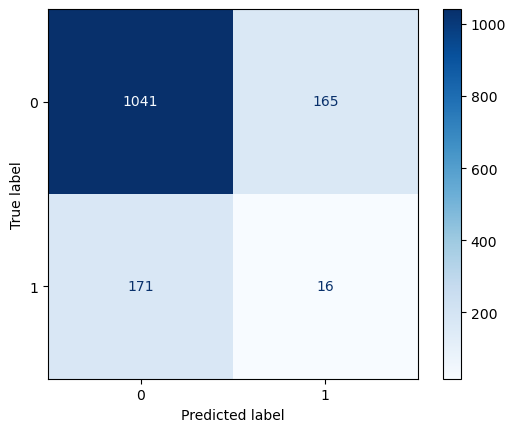

              precision    recall  f1-score   support

           0       0.86      0.86      0.86      1206
           1       0.09      0.09      0.09       187

    accuracy                           0.76      1393
   macro avg       0.47      0.47      0.47      1393
weighted avg       0.76      0.76      0.76      1393



In [27]:
# Parameter skews for Dummy Classifier baseline model

print_test_stats_header()

for i in ['most_frequent', 'uniform', 'stratified']:
    clf = DummyClassifier(strategy=i)
    pipe = Pipeline(steps=[
        ('preprocessor', preprocess),
        ('dummy_classifier', clf)   
    ])
    
    # Train Test Split
    X_train, X_test, y_train, y_test = train_test_split(df.drop(columns='target'),
                                                        df['target'],
                                                        test_size=0.25,
                                                        random_state=42,
                                                        stratify=df['target']
                                                       )
    
    # Run Pipeline
    pipe.fit(X_train, y_train)
    test_pred = pipe.predict(X_test)
    train_pred = pipe.predict(X_train)
    
    # Stats
    print_test_stats(pipe[1], y_test, test_pred, y_train, train_pred)
    
cm = confusion_matrix(y_test, test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

print(classification_report(y_test, test_pred))

## Decision Tree


| Stats: Model                                                      | Prec  | Recal | TstF1 | Accu  | TrnF1 |
-------------------------------------------------------------------------------------------------------------
 | DecisionTreeClassifier()                                         | 0.939 | 0.824 | 0.877 | 0.969 | 1.000 | 
 | DecisionTreeClassifier(max_depth=100)                            | 0.904 | 0.802 | 0.850 | 0.962 | 1.000 | 
 | DecisionTreeClassifier(max_depth=50)                             | 0.923 | 0.829 | 0.873 | 0.968 | 1.000 | 
 | DecisionTreeClassifier(max_depth=20)                             | 0.935 | 0.770 | 0.845 | 0.962 | 0.948 | 
 | DecisionTreeClassifier(max_depth=10)                             | 0.924 | 0.652 | 0.765 | 0.946 | 0.857 | 
 | DecisionTreeClassifier(max_depth=5)                              | 0.922 | 0.503 | 0.651 | 0.927 | 0.704 | 
 | DecisionTreeClassifier(max_depth=20)                             | 0.942 | 0.786 | 0.857 | 0.965 | 0.944 | 


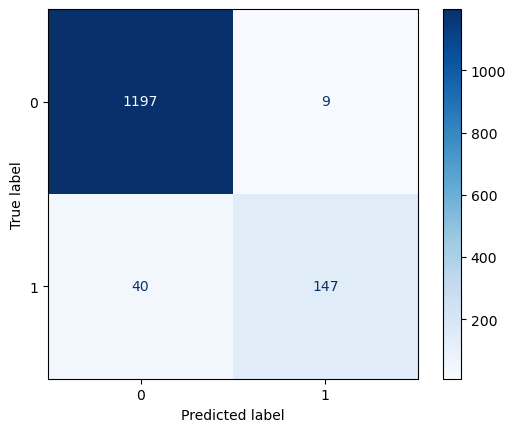

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1206
           1       0.94      0.79      0.86       187

    accuracy                           0.96      1393
   macro avg       0.95      0.89      0.92      1393
weighted avg       0.96      0.96      0.96      1393



In [28]:
# Parameter skews for Decision Tree model, standard pipeline

print_test_stats_header()

for i in [None, 100, 50, 20, 10, 5, 20]:
    dtc = DecisionTreeClassifier(max_depth=i)
    
    pipe_dt = Pipeline(steps=[
        ('preprocessor', preprocess),
        ('decision_tree_classifier', dtc)
    ])
    
    # Train Test Split
    X_train, X_test, y_train, y_test = train_test_split(df.drop(columns='target'),
                                                        df['target'],
                                                        test_size=0.25,
                                                        random_state=42,
                                                        stratify=df['target']
                                                       )
    
    # Run Pipeline
    pipe_dt.fit(X_train, y_train)
    test_pred = pipe_dt.predict(X_test)
    train_pred = pipe_dt.predict(X_train)
    
    # Stats
    print_test_stats(pipe_dt[1], y_test, test_pred, y_train, train_pred)

cm = confusion_matrix(y_test, test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

print(classification_report(y_test, test_pred))

In [29]:
# Show top 4 levels of decision tree as text

print(export_text(dtc,
                  feature_names=preprocess.get_feature_names_out(), 
                  class_names=['ham', 'spam'], 
                  max_depth=4)
      .replace('vectorize__', ''))

|--- numeric__org_length <= 0.75
|   |--- uk <= 0.50
|   |   |--- txt <= 0.50
|   |   |   |--- service <= 0.50
|   |   |   |   |--- ringtone <= 0.50
|   |   |   |   |   |--- truncated branch of depth 16
|   |   |   |   |--- ringtone >  0.50
|   |   |   |   |   |--- class: spam
|   |   |   |--- service >  0.50
|   |   |   |   |--- calls <= 0.50
|   |   |   |   |   |--- truncated branch of depth 3
|   |   |   |   |--- calls >  0.50
|   |   |   |   |   |--- class: ham
|   |   |--- txt >  0.50
|   |   |   |--- numeric__org_length <= 0.10
|   |   |   |   |--- class: ham
|   |   |   |--- numeric__org_length >  0.10
|   |   |   |   |--- want <= 0.50
|   |   |   |   |   |--- class: spam
|   |   |   |   |--- want >  0.50
|   |   |   |   |   |--- class: ham
|   |--- uk >  0.50
|   |   |--- yellow <= 0.50
|   |   |   |--- class: spam
|   |   |--- yellow >  0.50
|   |   |   |--- class: ham
|--- numeric__org_length >  0.75
|   |--- txt <= 0.50
|   |   |--- claim <= 0.50
|   |   |   |--- free <= 0.5

In [30]:
# Show nodes of the decision tree that are words in spam top 20 list. Show all levels

tree_text = str(export_text(dtc,
                            feature_names=preprocess.get_feature_names_out(),
                            class_names=['ham', 'spam'],
                            max_depth=9999)
                .replace('vectorize__', '')).split('\n')

for spam_word in spam_top_words.head(20)['word'].to_list():
    for node in tree_text:
        if spam_word in node:
            print(node)

|   |   |   |--- free <= 0.50
|   |   |   |--- free >  0.50
|   |   |--- txt <= 0.50
|   |   |--- txt >  0.50
|   |--- txt <= 0.50
|   |--- txt >  0.50
|   |   |   |   |   |   |   |--- mobile <= 0.50
|   |   |   |   |   |   |   |--- mobile >  0.50
|   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |--- text <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |--- text >  0.50
|   |   |   |   |   |   |--- claim <= 0.50
|   |   |   |   |   |   |--- claim >  0.50
|   |   |--- claim <= 0.50
|   |   |--- claim >  0.50
|   |   |   |   |   |   |   |   |   |   |   |--- reply <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- reply >  0.50
|   |   |   |   |--- www <= 0.50
|   |   |   |   |--- www >  0.50
|   |   |   |--- awww <= 0.50
|   |   |   |--- awww >  0.50
|   |   |   |   |   |   |   |   |   |   |   |   |   |--- prize <= 1.00
|   |   |   |   |   |   |   |   |   |   |   |   |   |--- prize >  1.00
|   |   |   |   |   |   |   |   |   | 

In [31]:
# show feature importances table for decision tree

dtc_features = pd.DataFrame(dtc.feature_importances_,
             index=preprocess.get_feature_names_out()
            ).sort_values(0, ascending=False).reset_index()
dtc_features.columns = ['feature', 'importance']
dtc_features['feature'] = dtc_features['feature'].str.replace('vectorize__', '')
dtc_features.head(20)

,feature,importance
0,numeric__org_length,0.308288
1,txt,0.099689
2,claim,0.069703
3,free,0.051276
4,service,0.050439
5,www,0.043360
6,uk,0.037333
7,150p,0.029810
8,sae,0.027251
9,mobile,0.026068


## Logistic Regression


| Stats: Model                                                      | Prec  | Recal | TstF1 | Accu  | TrnF1 |
-------------------------------------------------------------------------------------------------------------
 | LogisticRegression(C=0.01, class_weight='balanced')              | 0.717 | 0.882 | 0.791 | 0.938 | 0.787 | 
 | LogisticRegression(C=0.1, class_weight='balanced')               | 0.901 | 0.877 | 0.889 | 0.971 | 0.947 | 
 | LogisticRegression(C=0.5, class_weight='balanced')               | 0.960 | 0.893 | 0.925 | 0.981 | 0.989 | 
 | LogisticRegression(C=1, class_weight='balanced')                 | 0.965 | 0.888 | 0.925 | 0.981 | 0.996 | 
 | LogisticRegression(C=10, class_weight='balanced')                | 0.977 | 0.893 | 0.933 | 0.983 | 1.000 | 
 | LogisticRegression(C=100, class_weight='balanced')               | 0.982 | 0.882 | 0.930 | 0.982 | 1.000 | 
 | LogisticRegression(C=1000, class_weight='balanced')              | 0.994 | 0.882 | 0.935 | 0.983 | 1.000 | 
 |

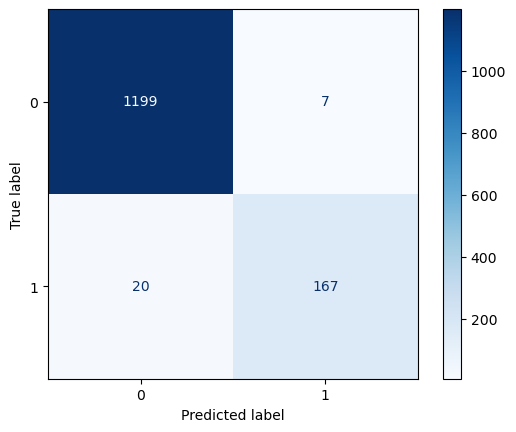

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1206
           1       0.96      0.89      0.93       187

    accuracy                           0.98      1393
   macro avg       0.97      0.94      0.96      1393
weighted avg       0.98      0.98      0.98      1393



In [32]:
# Parameter skews for Logistic Regression model, standard pipeline

print_test_stats_header()

for i in ['balanced']:
    for j in [0.01, 0.1, 0.5, 1, 10, 100, 1000, 0.5]:
        lr = LogisticRegression(class_weight=i, C=j)
        
        pipe_lr = Pipeline(steps=[
            ('preprocessor', preprocess),
            ('logistic_regression_classifier', lr)
        ])
        
        # Train Test Split
        X_train, X_test, y_train, y_test = train_test_split(df.drop(columns='target'),
                                                            df['target'],
                                                            test_size=0.25,
                                                            random_state=42,
                                                            stratify=df['target']
                                                           )
        
        # Run Pipeline
        pipe_lr.fit(X_train, y_train)
        test_pred = pipe_lr.predict(X_test)
        train_pred = pipe_lr.predict(X_train)
    
        # Stats
        print_test_stats(pipe_lr[1], y_test, test_pred, y_train, train_pred)

cm = confusion_matrix(y_test, test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

print(classification_report(y_test, test_pred))

In [33]:
# show coeffs for linear regression

coeff_df = pd.DataFrame(zip(preprocess.get_feature_names_out(), np.transpose(lr.coef_)), columns=['features', 'coeff'])
coeff_df['features'] = coeff_df['features'].str.replace('vectorize__', '')
coeff_df['abs_coeff'] = abs(coeff_df['coeff'])
coeff_df = coeff_df.sort_values('abs_coeff', ascending=False).reset_index()
coeff_df[['features', 'coeff']].head(20)

,features,coeff
0,uk,[2.015897344898732]
1,txt,[1.99557333495781]
2,new,[1.8759643680083802]
3,message,[1.7394075477478892]
4,service,[1.7007782383358716]
5,150p,[1.679929538334831]
6,freephone,[1.6618395683784997]
7,claim,[1.5909438994912186]
8,won,[1.5887972078554937]
9,146tf150p,[1.503392511957055]


## Model Stability

In [34]:
# models to test
# 5x model stability test for optimized models with standard pipeline

models = {
    'dt': DecisionTreeClassifier(max_depth=20),
    'lr': LogisticRegression(class_weight='balanced', C=0.5),
}

results_list = []

print_test_stats_header()

for i in range(5):
    # Train Test Split
    X_train, X_test, y_train, y_test = train_test_split(df.drop(columns='target'),
                                                            df['target'],
                                                            test_size=0.25,
                                                            stratify=df['target']
                                                           )
    for name, model in models.items():
        pipe = Pipeline(steps=[
                ('preprocessor', preprocess),
                (name, model)
            ])

        # Run Pipeline
        pipe.fit(X_train, y_train)
        test_pred = pipe.predict(X_test)
        train_pred = pipe.predict(X_train)
    
        # Stats
        print_test_stats(pipe[1], y_test, test_pred, y_train, train_pred) if i==0 else ''

        results_list.append([str(pipe[1]),
                             precision_score(y_test, test_pred),
                             recall_score(y_test, test_pred),
                             f1_score(y_test, test_pred),
                             accuracy_score(y_test, test_pred),
                             f1_score(y_train, train_pred)
                        ])

result_df = pd.DataFrame(results_list, columns=['Model', 'Precision', 'Recall', 'F1_Test', 'Accuracy', 'F1_Train'])

result_df.groupby('Model').agg(['mean', 'std']).style.format(precision=3)



| Stats: Model                                                      | Prec  | Recal | TstF1 | Accu  | TrnF1 |
-------------------------------------------------------------------------------------------------------------
 | DecisionTreeClassifier(max_depth=20)                             | 0.940 | 0.754 | 0.837 | 0.961 | 0.959 | 
 | LogisticRegression(C=0.5, class_weight='balanced')               | 0.943 | 0.888 | 0.915 | 0.978 | 0.989 | 
